In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/nyse/prices-split-adjusted.csv')

# 1. Remove Time from Date Column
# Convert 'date' column to datetime format, inferring the format for each element
df['date'] = pd.to_datetime(df['date'], format='mixed').dt.date

# 2. Determine the Label Column
# Assuming we want to predict the 'close' price, we set it as the target variable
target_column = 'close'
features = ['open', 'high', 'low', 'volume']

# 3. Feature Selection
# Drop columns that are not useful for the prediction, like 'symbol'
df = df.drop(columns=['symbol'])

# Optionally, you can perform feature engineering on the date column if needed
# For example, extracting the day, month, or quarter
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month
df['day'] = pd.to_datetime(df['date']).dt.day
df['quarter'] = pd.to_datetime(df['date']).dt.quarter

# Finalize the dataset with selected features and target column
X = df[features]  # Input features
y = df[target_column]  # Target variable (label)

# Display the first few rows of the processed data
print(df.head())


         date        open       close         low        high     volume  \
0  2016-01-05  123.430000  125.839996  122.309998  126.250000  2163600.0   
1  2016-01-06  125.239998  119.980003  119.940002  125.540001  2386400.0   
2  2016-01-07  116.379997  114.949997  114.930000  119.739998  2489500.0   
3  2016-01-08  115.480003  116.620003  113.500000  117.440002  2006300.0   
4  2016-01-11  117.010002  114.970001  114.089996  117.330002  1408600.0   

   year  month  day  quarter  
0  2016      1    5        1  
1  2016      1    6        1  
2  2016      1    7        1  
3  2016      1    8        1  
4  2016      1   11        1  


Statistical Summary:
                open          close            low           high  \
count  851264.000000  851264.000000  851264.000000  851264.000000   
mean       70.836986      70.857109      70.118414      71.543476   
std        83.695876      83.689686      82.877294      84.465504   
min         0.850000       0.860000       0.830000       0.880000   
25%        33.840000      33.849998      33.480000      34.189999   
50%        52.770000      52.799999      52.230000      53.310001   
75%        79.879997      79.889999      79.110001      80.610001   
max      1584.439941    1578.130005    1549.939941    1600.930054   

             volume  
count  8.512640e+05  
mean   5.415113e+06  
std    1.249468e+07  
min    0.000000e+00  
25%    1.221500e+06  
50%    2.476250e+06  
75%    5.222500e+06  
max    8.596434e+08  


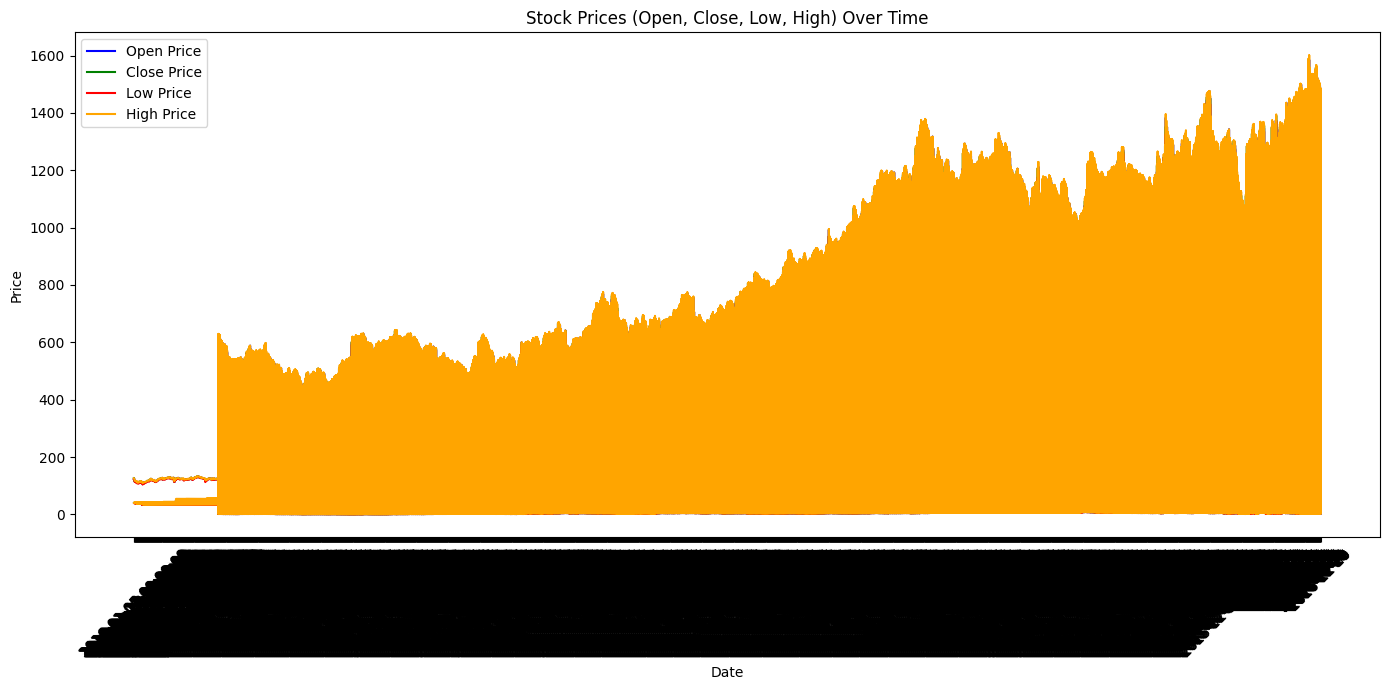

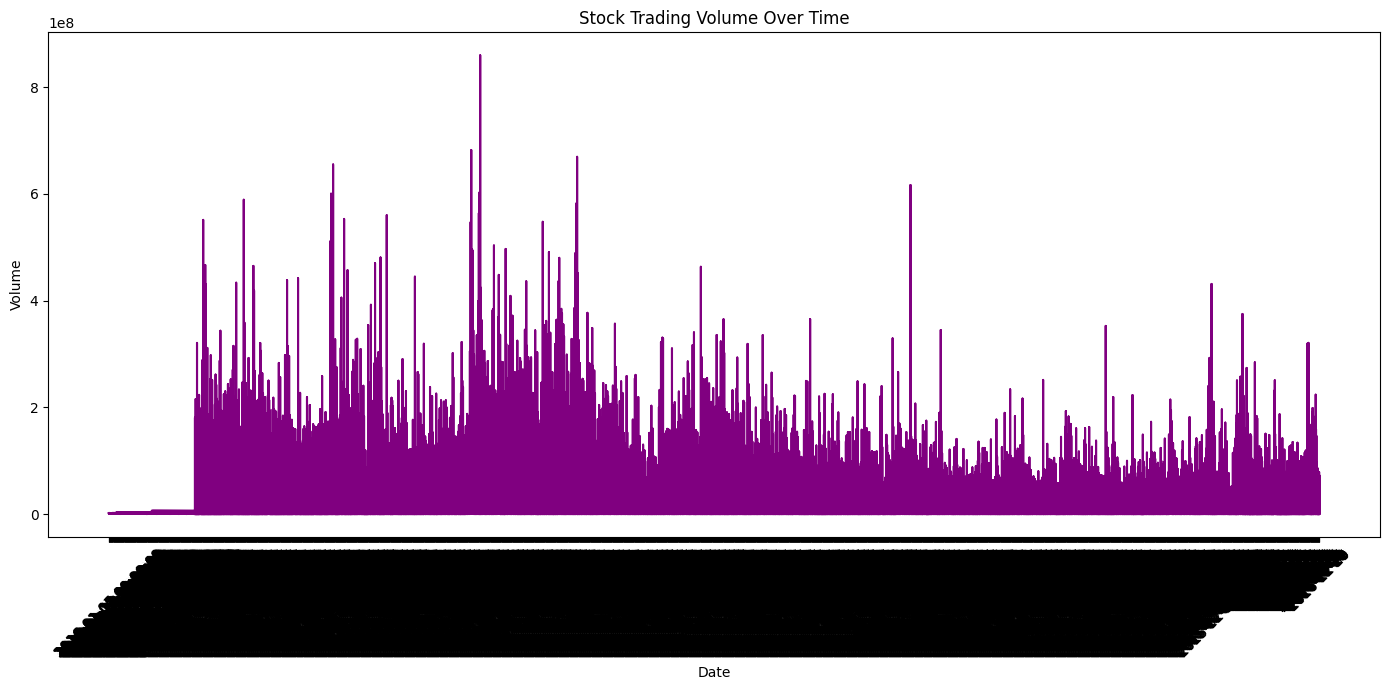

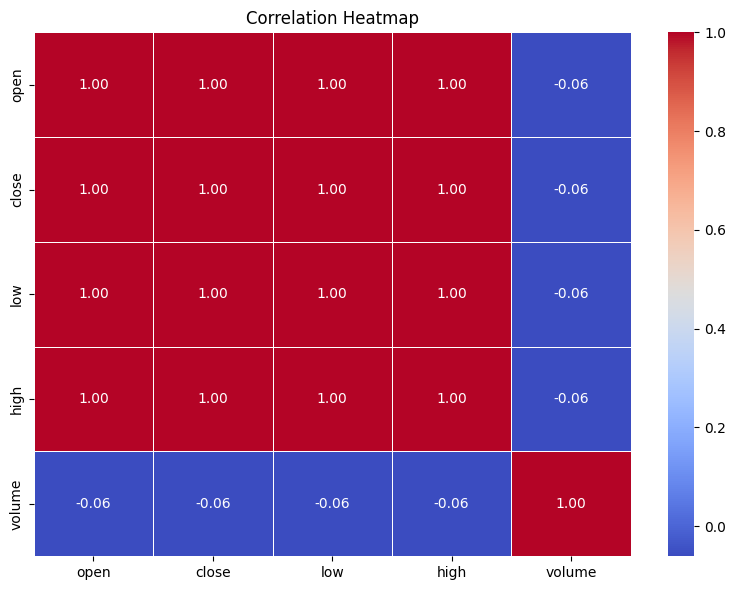

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming the data is already preprocessed in df)
df = pd.read_csv('/kaggle/input/nyse/prices.csv')

# 2. Exploratory Data Analysis (EDA)

# Statistical Summary
print("Statistical Summary:")
print(df.describe())

# Line Plot for Time Series Analysis (Open, Close, Low, High)
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['open'], label='Open Price', color='blue')
plt.plot(df['date'], df['close'], label='Close Price', color='green')
plt.plot(df['date'], df['low'], label='Low Price', color='red')
plt.plot(df['date'], df['high'], label='High Price', color='orange')
plt.title('Stock Prices (Open, Close, Low, High) Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Volume Plot (Volume of Stocks Traded Over Time)
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['volume'], label='Volume', color='purple')
plt.title('Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation Heatmap (Between Open, Close, Low, High, Volume)
correlation_matrix = df[['open', 'close', 'low', 'high', 'volume']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# 1. Define Input and Output
# Assuming you want to predict 'close' using 'open', 'high', 'low', and 'volume' as input features.
features = ['open', 'high', 'low', 'volume']
target_column = 'close'

X = df[features].values
y = df[target_column].values

# 2. Data Preprocessing: Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Data Splitting: Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# 4. Network Architecture: Define the DNN model with an additional hidden layer
class StockPricePredictor(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, output_dim=1):
        super(StockPricePredictor, self).__init__()
        
        # Define the layers of the network
        self.fc1 = nn.Linear(input_dim, hidden_dim)   # First hidden layer
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)  # Second hidden layer (previous one)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)  # Additional hidden layer (new)
        self.fc4 = nn.Linear(hidden_dim, hidden_dim)
        self.fc5 = nn.Linear(hidden_dim, output_dim)  # Output layer
        
        # Define the activation function (ReLU)
        self.relu = nn.ReLU()
        self.loss_fn = nn.MSELoss()

    def forward(self, x):
        # Forward propagation through the network
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))  # Passing through the new hidden layer
        x = self.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# Initialize the model
input_dim = X_train.shape[1]  # Number of input features
model = StockPricePredictor(input_dim)

# 5. Optimizer: Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 6. Training the Model
epochs = 100
for epoch in range(epochs):
    model.train()
    
    # Forward propagation
    y_pred = model(X_train_tensor)
    
    # Compute the loss
    loss = model.loss_fn(y_pred, y_train_tensor)
    
    # Backward propagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Validation loss
    if (epoch+1) % 10 == 0:
        model.eval()
        with torch.no_grad():
            val_pred = model(X_val_tensor)
            val_loss = model.loss_fn(val_pred, y_val_tensor)
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

# 7. Test the Model
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test_tensor)
    test_loss = model.loss_fn(y_test_pred, y_test_tensor)
    
print(f'Test Loss: {test_loss.item():.4f}')

# Optionally, you can evaluate the model's performance using other metrics (e.g., RMSE, MAE)
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Convert predictions and targets to numpy arrays for metrics calculation
y_test_pred_np = y_test_pred.numpy()
y_test_np = y_test_tensor.numpy()

mae = mean_absolute_error(y_test_np, y_test_pred_np)
rmse = math.sqrt(mean_squared_error(y_test_np, y_test_pred_np))

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

Epoch [10/100], Loss: 11933.6553, Val Loss: 12203.7227
Epoch [20/100], Loss: 11817.1348, Val Loss: 12069.2803
Epoch [30/100], Loss: 11415.1582, Val Loss: 11604.1191
Epoch [40/100], Loss: 10178.0312, Val Loss: 10199.4717
Epoch [50/100], Loss: 7137.7031, Val Loss: 6848.1885
Epoch [60/100], Loss: 2335.4192, Val Loss: 1958.0579
Epoch [70/100], Loss: 1217.7041, Val Loss: 1312.1561
Epoch [80/100], Loss: 583.8033, Val Loss: 564.1348
Epoch [90/100], Loss: 521.0208, Val Loss: 504.3414
Epoch [100/100], Loss: 350.3396, Val Loss: 351.2609
Test Loss: 348.2467
Mean Absolute Error (MAE): 13.6034
Root Mean Squared Error (RMSE): 18.6614


In [6]:
# 5. Hyperparameter Tuning Loop
learning_rates = [0.001, 0.01, 0.1]
optimizers = ['SGD', 'Adam', 'RMSprop']
epochs_list = [50, 100, 200]

best_model = None
best_params = None
best_val_loss = float('inf')

# Loop through all combinations of hyperparameters
for lr in learning_rates:
    for optimizer_name in optimizers:
        for epochs in epochs_list:
            
            # Initialize the model
            model = StockPricePredictor(input_dim=X_train.shape[1])
            
            # Select optimizer
            if optimizer_name == 'SGD':
                optimizer = optim.SGD(model.parameters(), lr=lr)
            elif optimizer_name == 'Adam':
                optimizer = optim.Adam(model.parameters(), lr=lr)
            elif optimizer_name == 'RMSprop':
                optimizer = optim.RMSprop(model.parameters(), lr=lr)
            
            # Training the model
            for epoch in range(epochs):
                model.train()
                
                # Forward propagation
                y_pred = model(X_train_tensor)
                
                # Loss function
                loss_fn = nn.MSELoss()
                loss = loss_fn(y_pred, y_train_tensor)
                
                # Backward propagation and optimization
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            # Validation loss after training
            model.eval()
            with torch.no_grad():
                val_pred = model(X_val_tensor)
                val_loss = loss_fn(val_pred, y_val_tensor)
            
            # Save the best model based on validation loss
            if val_loss.item() < best_val_loss:
                best_val_loss = val_loss.item()
                best_model = model
                best_params = {'learning_rate': lr, 'optimizer': optimizer_name, 'epochs': epochs}

            print(f"LR: {lr}, Optimizer: {optimizer_name}, Epochs: {epochs}, Val Loss: {val_loss.item():.4f}")

# 6. Test the Best Model
best_model.eval()
with torch.no_grad():
    y_test_pred = best_model(X_test_tensor)
    test_loss = loss_fn(y_test_pred, y_test_tensor)
    
print(f'Test Loss for Best Model: {test_loss.item():.4f}')
print(f'Best Hyperparameters: {best_params}')

# Optionally, you can evaluate the model's performance using other metrics (e.g., RMSE, MAE)
y_test_pred_np = y_test_pred.numpy()
y_test_np = y_test_tensor.numpy()

mae = mean_absolute_error(y_test_np, y_test_pred_np)
rmse = math.sqrt(mean_squared_error(y_test_np, y_test_pred_np))

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

LR: 0.001, Optimizer: SGD, Epochs: 50, Val Loss: nan
LR: 0.001, Optimizer: SGD, Epochs: 100, Val Loss: nan
LR: 0.001, Optimizer: SGD, Epochs: 200, Val Loss: nan
LR: 0.001, Optimizer: Adam, Epochs: 50, Val Loss: 3604.2700
LR: 0.001, Optimizer: Adam, Epochs: 100, Val Loss: 262.7339
LR: 0.001, Optimizer: Adam, Epochs: 200, Val Loss: 19.1483
LR: 0.001, Optimizer: RMSprop, Epochs: 50, Val Loss: 37.2186
LR: 0.001, Optimizer: RMSprop, Epochs: 100, Val Loss: 11.8040
LR: 0.001, Optimizer: RMSprop, Epochs: 200, Val Loss: 9.9484
LR: 0.01, Optimizer: SGD, Epochs: 50, Val Loss: nan
LR: 0.01, Optimizer: SGD, Epochs: 100, Val Loss: nan
LR: 0.01, Optimizer: SGD, Epochs: 200, Val Loss: nan
LR: 0.01, Optimizer: Adam, Epochs: 50, Val Loss: 51.1672
LR: 0.01, Optimizer: Adam, Epochs: 100, Val Loss: 3.5787
LR: 0.01, Optimizer: Adam, Epochs: 200, Val Loss: 1.3315
LR: 0.01, Optimizer: RMSprop, Epochs: 50, Val Loss: 17.6864
LR: 0.01, Optimizer: RMSprop, Epochs: 100, Val Loss: 17.5605
LR: 0.01, Optimizer: RMSpr

Epoch 1/200, Training Loss: 11971.3027, Validation Loss: 12187.3877
Epoch 2/200, Training Loss: 11911.0518, Validation Loss: 12064.7002
Epoch 3/200, Training Loss: 11791.1553, Validation Loss: 11815.5830
Epoch 4/200, Training Loss: 11547.6875, Validation Loss: 11352.4844
Epoch 5/200, Training Loss: 11094.9580, Validation Loss: 10565.8057
Epoch 6/200, Training Loss: 10325.8828, Validation Loss: 9345.0020
Epoch 7/200, Training Loss: 9132.1055, Validation Loss: 7614.1226
Epoch 8/200, Training Loss: 7439.0757, Validation Loss: 5424.1709
Epoch 9/200, Training Loss: 5296.7954, Validation Loss: 3135.9858
Epoch 10/200, Training Loss: 3057.3508, Validation Loss: 1805.7275
Epoch 11/200, Training Loss: 1749.2339, Validation Loss: 2983.4817
Epoch 12/200, Training Loss: 2880.3057, Validation Loss: 3373.2356
Epoch 13/200, Training Loss: 3253.7603, Validation Loss: 2009.2052
Epoch 14/200, Training Loss: 1932.5303, Validation Loss: 802.8004
Epoch 15/200, Training Loss: 770.1136, Validation Loss: 481.1

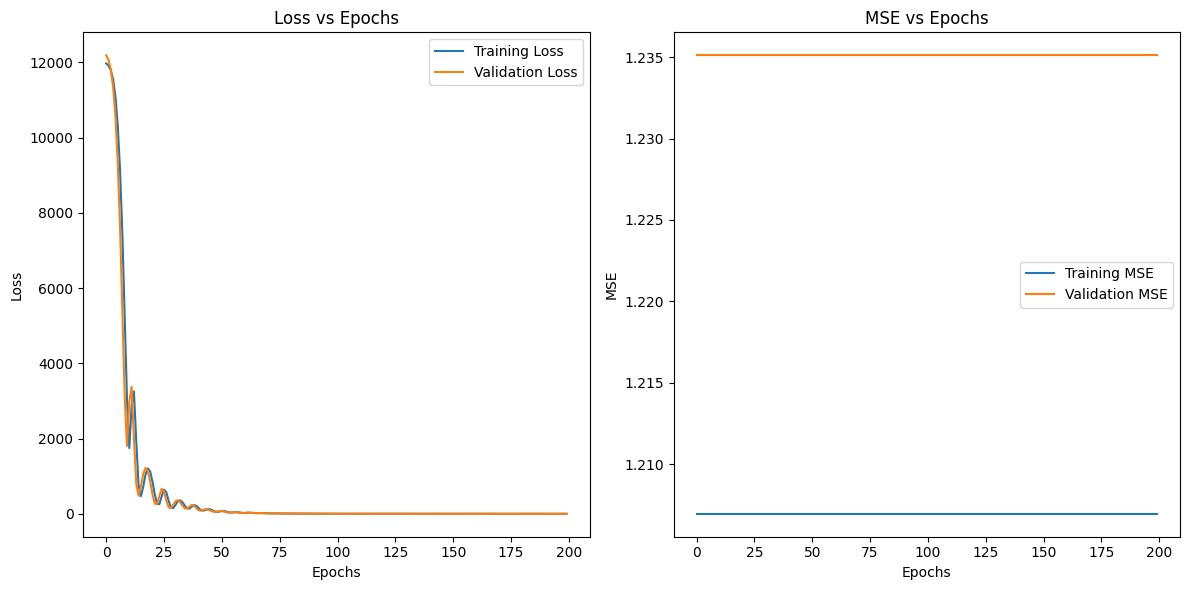

In [7]:
# 5. Hyperparameter Tuning Loop (for this example, we use fixed hyperparameters for simplicity)
learning_rate = 0.01
optimizer_name = 'Adam'
epochs = 200

# Initialize the model
model = StockPricePredictor(input_dim=X_train.shape[1])

# Select optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Loss function
loss_fn = nn.MSELoss()

# 6. Training the model and recording losses
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    
    # Forward propagation
    y_train_pred = model(X_train_tensor)
    
    # Compute training loss
    train_loss = loss_fn(y_train_pred, y_train_tensor)
    
    # Backward propagation and optimization
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    
    # Record the training loss
    train_losses.append(train_loss.item())
    
    # Validation loss
    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_val_tensor)
        val_loss = loss_fn(y_val_pred, y_val_tensor)
    
    # Record the validation loss
    val_losses.append(val_loss.item())
    
    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")

# 7. Plotting the loss curves
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# 8. Plotting MSE (Mean Squared Error) over epochs for both training and validation
train_mse = [mean_squared_error(y_train_tensor.numpy(), model(X_train_tensor).detach().numpy()) for _ in range(epochs)]
val_mse = [mean_squared_error(y_val_tensor.numpy(), model(X_val_tensor).detach().numpy()) for _ in range(epochs)]

plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_mse, label='Training MSE')
plt.plot(range(epochs), val_mse, label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/200, Training Loss: 11994.5254, Validation Loss: 12214.8760
Epoch 2/200, Training Loss: 11810.5117, Validation Loss: 12139.6074
Epoch 3/200, Training Loss: 11666.1885, Validation Loss: 11971.5635
Epoch 4/200, Training Loss: 11554.0020, Validation Loss: 11693.8135
Epoch 5/200, Training Loss: 11465.4189, Validation Loss: 11337.2061
Epoch 6/200, Training Loss: 11386.1533, Validation Loss: 10973.0537
Epoch 7/200, Training Loss: 11306.7852, Validation Loss: 10669.2002
Epoch 8/200, Training Loss: 11225.7461, Validation Loss: 10455.3320
Epoch 9/200, Training Loss: 11142.9580, Validation Loss: 10323.7354
Epoch 10/200, Training Loss: 11058.0830, Validation Loss: 10234.2822
Epoch 11/200, Training Loss: 10974.3545, Validation Loss: 10110.1855
Epoch 12/200, Training Loss: 10889.0146, Validation Loss: 9915.9824
Epoch 13/200, Training Loss: 10798.6865, Validation Loss: 9664.1631
Epoch 14/200, Training Loss: 10703.0020, Validation Loss: 9392.1641
Epoch 15/200, Training Loss: 10602.3682, Valid

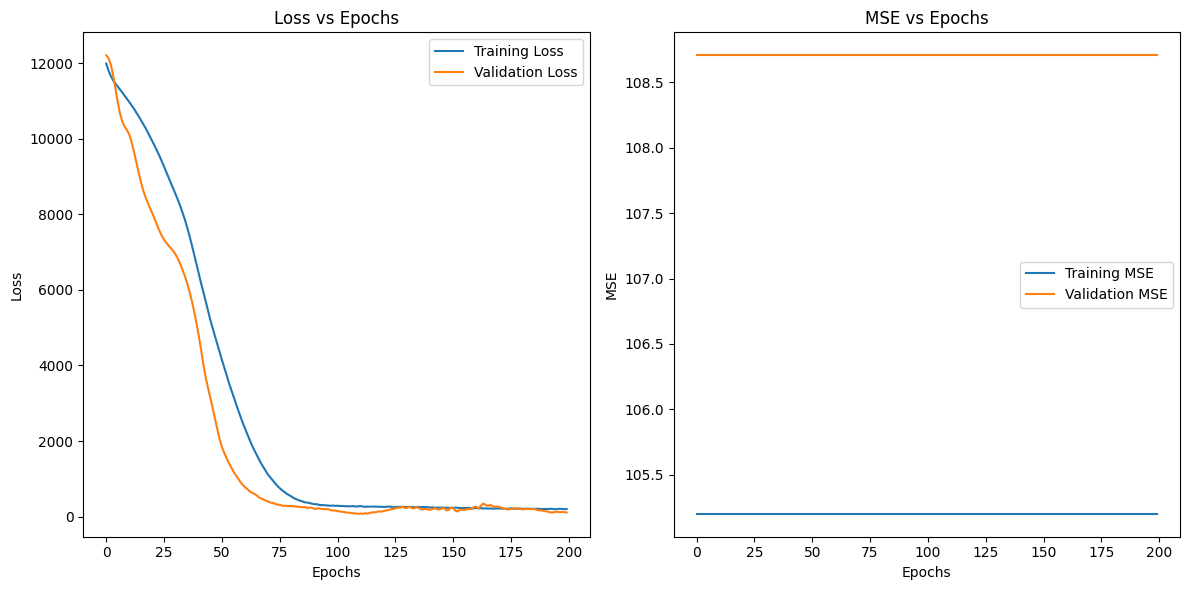

In [8]:
# 4. Define the model architecture with Dropout and Batch Normalization
class StockPricePredictor(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, output_dim=1, dropout_prob=0.3):
        super(StockPricePredictor, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.bn1 = nn.BatchNorm1d(hidden_dim)  # Batch Normalization
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.bn2 = nn.BatchNorm1d(hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.bn3 = nn.BatchNorm1d(hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, hidden_dim)
        self.bn4 = nn.BatchNorm1d(hidden_dim)
        self.fc5 = nn.Linear(hidden_dim, output_dim)
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_prob)  # Dropout layer

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))  # Batch Normalization + ReLU
        x = self.dropout(x)  # Dropout
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        x = self.relu(self.bn4(self.fc4(x)))
        x = self.fc5(x)
        return x

# 5. Hyperparameter Tuning Loop (for this example, we use fixed hyperparameters for simplicity)
learning_rate = 0.01
optimizer_name = 'Adam'
epochs = 200
weight_decay = 0.001  # L2 Regularization (weight decay)

# Initialize the model
model = StockPricePredictor(input_dim=X_train.shape[1])

# Select optimizer (with L2 Regularization)
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Loss function
loss_fn = nn.MSELoss()

# 6. Training the model and recording losses
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    
    # Forward propagation
    y_train_pred = model(X_train_tensor)
    
    # Compute training loss
    train_loss = loss_fn(y_train_pred, y_train_tensor)
    
    # Backward propagation and optimization
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    
    # Record the training loss
    train_losses.append(train_loss.item())
    
    # Validation loss
    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_val_tensor)
        val_loss = loss_fn(y_val_pred, y_val_tensor)
    
    # Record the validation loss
    val_losses.append(val_loss.item())
    
    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")

# 7. Plotting the loss curves
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# 8. Plotting MSE (Mean Squared Error) over epochs for both training and validation
train_mse = [mean_squared_error(y_train_tensor.numpy(), model(X_train_tensor).detach().numpy()) for _ in range(epochs)]
val_mse = [mean_squared_error(y_val_tensor.numpy(), model(X_val_tensor).detach().numpy()) for _ in range(epochs)]

plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_mse, label='Training MSE')
plt.plot(range(epochs), val_mse, label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()